## Задача 1

In [1]:
import numpy as np
import scipy as sc
import scipy.linalg
import cvxpy as cp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [81]:
def linear_subspace_projection(A, b, y):
    """
    Возвращает точку x: Ax=b, ||x-y||->min
    
    Args:
        A: ndarray(m, n)
        b: ndarray(m, 1)
        y: ndarray(n, 1)
        
    Returns:
        x: ndarray(n, 1)
    """
    
    lamb = np.linalg.inv(A @ A.T) @ ((b - A @ y) * 2)
    x = ((lamb @ A).T + 2.0 * y) / 2.0
    return x

In [82]:
def show_projection():
    fig, ax = plt.subplots(1, 1, figsize=(7, 7))
        
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
        
    A = np.random.rand(1, 2)
    b = 0.5
    
    y = np.random.rand(2, 1)
    
    x = linear_subspace_projection(A, b, y)
    ax.scatter([y[0], x[0]], [y[1], x[1]], color='black')
    ax.plot([y[0], x[0]], [y[1], x[1]], color='grey', linestyle='--')
    ax.text(x[0] - 0.1, x[1] - 0.1, 'x', fontsize = 15)
    ax.text(y[0] + 0.1, y[1] + 0.1, 'y', fontsize = 15)
    delta = 0.05
    p = np.arange(-1.5, 1.5, delta)
    q = np.arange(-1.5, 1.5, delta)
    X, Y = np.meshgrid(p, q)
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i][j] = A @ np.array([X[i][j], Y[i][j]])
    CS = ax.contour(X, Y, Z, [b], colors=['blue'])
    plt.close(fig)
    return fig

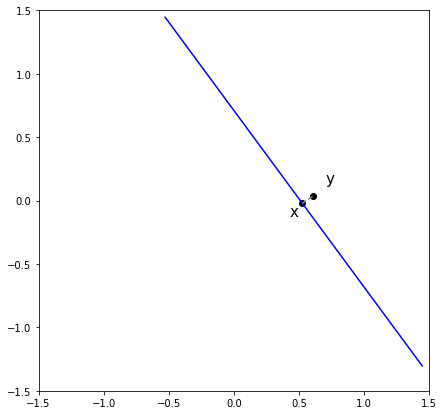

In [83]:
show_projection()

## Задача 2

In [140]:
def logistic_regression(x, y, alpha, iters):
    """
    Возвращает оптимальные параметры логистической регрессии theta, beta, полученные минимизацией кросс-энтропии
    
    Args:
        x: ndarray(m, n) -- матрица, каждая строка которой является точкой, которые отделяются регрессией
        y: ndarray(m)    -- вектор-столбец, i-ый элемент которого соответствует метке i-ой строке в x,
                            принимает значения 0 или 1
        alpha: float -- размер шага для градиентного спуска
        iters: int   -- количество итераций градиентного спуска
    Returns:
        theta: ndarray(n)
        beta: float/ndarray(1) -- параметры регрессии
    """
    m, n = x.shape
    theta = np.full((n,), 0).astype(np.float)
    beta = 0.0

    def sigma(kek):
        return 1.0 / (np.exp(-kek) + 1.0)

    for iter in range(iters):
        grad_theta = np.full((n,), 0).astype(np.float)
        grad_beta = np.full((1,), 0).astype(np.float)
        for i in range(m):
            grad_beta += (y[i] - sigma(theta.T @ x[i] + beta))
            grad_theta += (y[i] - sigma(theta.T @ x[i] + beta)) * x[i]
        grad_theta *= (-1.0 / m)
        grad_beta *= (-1.0 / m)
        theta -= alpha * grad_theta
        beta  -= alpha * grad_beta
    return theta, beta

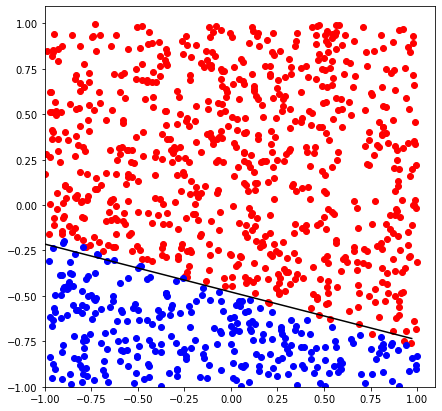

In [141]:
fig, ax = plt.subplots(figsize=[7, 7])
n = 2
m = 1000
x = 2 * np.random.rand(m, n) - 1
a = np.random.rand(n)
b = 0.2

y = (np.sign(x @ a + np.ones(m) * b) + 1) / 2

theta, beta = logistic_regression(x, y, 0.05, 1000)

ax.scatter(x[y > 0,0], x[y > 0,1], color='red')
ax.scatter(x[y == 0,0], x[y == 0,1], color='blue')
#Level contours
delta = 0.025
x_ = np.arange(-1, 1, delta)
y_ = np.arange(-1, 1, delta)
X, Y = np.meshgrid(x_, y_)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i][j] = theta @ np.array([X[i][j], Y[i][j]]) + beta
        
CS = ax.contour(X, Y, Z, [0], colors=['black'])
plt.close(fig)
fig

## Задача 3

In [64]:
def solve_lp(A, b, c):
    x = cp.Variable(len(c))
    cp.Problem(cp.Minimize(c @ x), [A * x <= b, x >= 0]).solve()
    return x.value

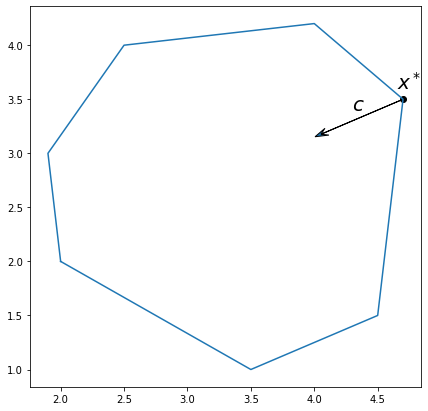

In [65]:
# from two points defines the coefficients a, b, c such that a line ax+by=c goes through these points 
def get_line(x1, x2):
    a = x1[1] - x2[1]
    b = x2[0] - x1[0]
    c = a * x1[0] + b * x1[1]
    return a, b, c

vertices = [(2.0, 2.0), (1.9, 3.0), (2.5, 4.0), (4.0, 4.2), (4.7, 3.5), (4.5, 1.5), (3.5, 1.0), (2.0, 2.0)]
A = []
b = []

fig, ax = plt.subplots(figsize=(7, 7))

for i in range(len(vertices) - 1):
    a_, b_, c_ = get_line(vertices[i], vertices[i + 1])
    A.append([a_, b_])
    b.append(c_)
    #print(f'{float(a):6.2} * x + {float(b):4.2} * y <= {float(a):4.2}')
A = np.array(A)
b = np.array(b)
direction = np.array([-2, -1]) # c
x = solve_lp(A, b, direction)
ax.plot([x for x, y in vertices], [y for x, y in vertices])
ax.scatter([x[0]], [x[1]], color='black')
ax.arrow(x[0], x[1], direction[0] * 0.3, direction[1] * 0.3, head_width=0.07, overhang=0.5)
ax.text(x[0] + direction[0] * 0.15 - 0.1, x[1] + direction[0] * 0.15 + 0.2, '$c$', fontsize=20)
ax.text(x[0] - 0.05, x[1] + 0.1, '$x^*$', fontsize=20)

plt.close(fig)
fig

## Задача 4

In [94]:
def min_max(a, b):
    if np.all(a > 0) or np.all(a < 0):
        raise "No minimum"
    m, = a.shape
    intersect_p = []
    for i in range(m):
        for j in range(i):
            if a[i] - a[j] != 0:
                intersect_p.append(- (b[i] - b[j]) / (a[i] - a[j]))
    
    res, res_p = np.inf, 0
    for p in intersect_p:
        cur = max([a[i] * p + b[i] for i in range(m)])
        if cur < res:
            res, res_p = cur, p
    return res_p

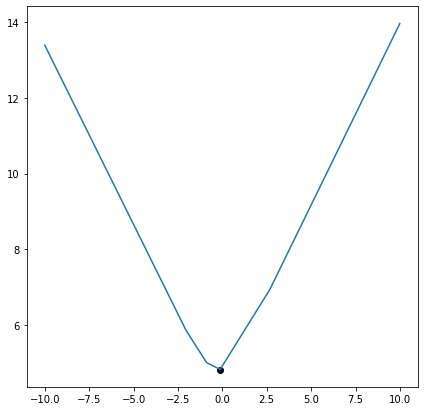

In [95]:
m = 100
a = np.random.rand(m) * 2 - 1
b = 5 * (np.random.rand(m) * 2 - 1)

q = np.arange(-10, 10, 0.01)

f = lambda x: max([a[i] * x + b[i] for i in range(a.shape[0])])

x = min_max(a, b)

fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(q, [f(x) for x in q])
ax.scatter([x], [f(x)], color='black')
plt.close(fig)
fig